# Importing necessary libraries and data 
**Assigning column names.

Maintenance of Naval Propulsion Plants Data Set
Predicting Gas Turbine propulsion plant's decay state coefficient

Data Set Information:

The experiments have been carried out by means of a numerical simulator of a naval vessel (Frigate) characterized by a Gas Turbine (GT) propulsion plant. The different blocks forming the complete simulator (Propeller, Hull, GT, Gear Box and Controller) have been developed and fine tuned over the year on several similar real propulsion plants. In view of these observations the available data are in agreement with a possible real vessel. In this release of the simulator it is also possible to take into account the performance decay over time of the GT components such as GT compressor and turbines. The propulsion system behaviour has been described with this parameters: - Ship speed (linear function of the lever position lp). - Compressor degradation coefficient kMc. - Turbine degradation coefficient kMt. so that each possible degradation state can be described by a combination of this triple (lp,kMt,kMc). The range of decay of compressor and turbine has been sampled with an uniform grid of precision 0.001 so to have a good granularity of representation. In particular for the compressor decay state discretization the kMc coefficient has been investigated in the domain [1; 0.95], and the turbine coefficient in the domain [1; 0.975]. Ship speed has been investigated sampling the range of feasible speed from 3 knots to 27 knots with a granularity of representation equal to tree knots. A series of measures (16 features) which indirectly represents of the state of the system subject to performance decay has been acquired and stored in the dataset over the parameter's space.

Attribute Information:

A 16-feature vector containing the GT measures at steady state of the physical asset: Lever position (lp) [ ] Ship speed (v) [knots] Gas Turbine (GT) shaft torque (GTT) [kN m] GT rate of revolutions (GTn) [rpm] Gas Generator rate of revolutions (GGn) [rpm] Starboard Propeller Torque (Ts) [kN] Port Propeller Torque (Tp) [kN] Hight Pressure (HP) Turbine exit temperature (T48) [C] GT Compressor inlet air temperature (T1) [C] GT Compressor outlet air temperature (T2) [C] HP Turbine exit pressure (P48) [bar] GT Compressor inlet air pressure (P1) [bar] GT Compressor outlet air pressure (P2) [bar] GT exhaust gas pressure (Pexh) [bar] Turbine Injecton Control (TIC) [%] Fuel flow (mf) [kg/s]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns

new_columns = ['Lever position (lp)', 'Ship speed (v) [knots]', 'Gas Turbine (GT) shaft torque (GTT) [kN m]', 'GT rate of revolutions (GTn) [rpm]',
              'Gas Generator rate of revolutions (GGn) [rpm]', 'Starboard Propeller Torque (Ts) [kN]', 'Port Propeller Torque (Tp) [kN]',
              'Hight Pressure (HP) Turbine exit temperature (T48) [C]', 'GT Compressor inlet air temperature (T1) [C]', 'GT Compressor outlet air temperature (T2) [C]',
              'HP Turbine exit pressure (P48) [bar]', 'GT Compressor inlet air pressure (P1) [bar]', 'GT Compressor outlet air pressure (P2) [bar]',
              'GT exhaust gas pressure (Pexh) [bar]', 'Turbine Injecton Control (TIC) [%]', 'Fuel flow (mf) [kg/s]', 'GT Compressor decay state coefficient',
              'GT Turbine decay state coefficient']

df = pd.read_csv('data1.csv', header = None, names = new_columns)

Explatory Data Analysis starts with the .head() function.

In [3]:
df.head()

,Lever position (lp),Ship speed (v) [knots],Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,1.14,3.0,290.0,1350.0,6680.0,7.58,7.58,464.0,288.0,551.0,1.10,0.998,5.95,1.02,7.14,0.082,0.95,0.975
1,2.09,6.0,6960.0,1380.0,6830.0,28.20,28.20,635.0,288.0,582.0,1.33,0.998,7.28,1.02,10.70,0.287,0.95,0.975
2,3.14,9.0,8380.0,1390.0,7110.0,60.40,60.40,606.0,288.0,588.0,1.39,0.998,7.57,1.02,13.10,0.259,0.95,0.975
3,4.16,12.0,14700.0,1550.0,7790.0,114.00,114.00,661.0,288.0,614.0,1.66,0.998,9.01,1.02,18.10,0.358,0.95,0.975
4,5.14,15.0,21600.0,1920.0,8490.0,175.00,175.00,731.0,288.0,646.0,2.08,0.998,11.20,1.03,26.40,0.522,0.95,0.975


Info about the data set. As seen on the results, there are 18 features and 11934 observations. Since all observations were consisted of float64 numeric variables and there is no missing data, we can accept that the data set is clean.  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 18 columns):
Lever position (lp)                                       11934 non-null float64
Ship speed (v) [knots]                                    11934 non-null float64
Gas Turbine (GT) shaft torque (GTT) [kN m]                11934 non-null float64
GT rate of revolutions (GTn) [rpm]                        11934 non-null float64
Gas Generator rate of revolutions (GGn) [rpm]             11934 non-null float64
Starboard Propeller Torque (Ts) [kN]                      11934 non-null float64
Port Propeller Torque (Tp) [kN]                           11934 non-null float64
Hight Pressure (HP) Turbine exit temperature (T48) [C]    11934 non-null float64
GT Compressor inlet air temperature (T1) [C]              11934 non-null float64
GT Compressor outlet air temperature (T2) [C]             11934 non-null float64
HP Turbine exit pressure (P48) [bar]                      11934 non-null float64


In order to be sure that there is no missing data, we run .isnull().sum() functions to calculate the missing data amount.

In [5]:
df.isnull().sum()

Lever position (lp)                                       0
Ship speed (v) [knots]                                    0
Gas Turbine (GT) shaft torque (GTT) [kN m]                0
GT rate of revolutions (GTn) [rpm]                        0
Gas Generator rate of revolutions (GGn) [rpm]             0
Starboard Propeller Torque (Ts) [kN]                      0
Port Propeller Torque (Tp) [kN]                           0
Hight Pressure (HP) Turbine exit temperature (T48) [C]    0
GT Compressor inlet air temperature (T1) [C]              0
GT Compressor outlet air temperature (T2) [C]             0
HP Turbine exit pressure (P48) [bar]                      0
GT Compressor inlet air pressure (P1) [bar]               0
GT Compressor outlet air pressure (P2) [bar]              0
GT exhaust gas pressure (Pexh) [bar]                      0
Turbine Injecton Control (TIC) [%]                        0
Fuel flow (mf) [kg/s]                                     0
GT Compressor decay state coefficient   

Statistical Information about our data. At the first glance GT Compressor inlet air temperature[T1][C]'s std = 0. A zero standard deviation can only be possible when all the values of a variable are the same (all equal to the mean). In this case, those variables have no discriminative power so they can be removed from the analysis. They cannot improve any classification, clustering or regression task. 

In [6]:
df.describe()

,Lever position (lp),Ship speed (v) [knots],Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.167778,15.000000,27249.165996,2137.177811,8200.955254,227.297807,227.297807,735.495726,288.0,646.215100,2.353415,9.980000e-01,12.297610,1.030000,33.641437,0.662556,0.97500,0.9875
std,2.627068,7.746291,22159.091763,774.184863,1091.297870,200.487306,200.487306,173.680016,0.0,72.676721,1.084821,2.533635e-13,5.337468,0.010541,25.841674,0.507320,0.01472,0.0075
min,1.140000,3.000000,254.000000,1310.000000,6590.000000,5.300000,5.300000,442.000000,288.0,540.000000,1.090000,9.980000e-01,5.830000,1.020000,0.000000,0.068000,0.95000,0.9750
25%,3.140000,9.000000,8380.000000,1390.000000,7060.000000,60.300000,60.300000,590.000000,288.0,578.000000,1.390000,9.980000e-01,7.450000,1.020000,13.700000,0.246000,0.96200,0.9810
50%,5.140000,15.000000,21600.000000,1920.000000,8480.000000,175.000000,175.000000,706.000000,288.0,637.000000,2.080000,9.980000e-01,11.100000,1.030000,25.300000,0.496000,0.97500,0.9875
75%,7.150000,21.000000,39000.000000,2680.000000,9130.000000,332.000000,332.000000,834.000000,288.0,694.000000,2.980000,9.980000e-01,15.700000,1.040000,44.600000,0.882000,0.98800,0.9940
max,9.300000,27.000000,72800.000000,3560.000000,9800.000000,645.000000,645.000000,1120.000000,288.0,789.000000,4.560000,9.980000e-01,23.100000,1.050000,92.600000,1.830000,1.00000,1.0000


After transposing the statistical data, it is obviously seen that observations under GT Compressor inlet air temperature (T1) [C] feature are the same.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lever position (lp),11934.0,5.167778,2.627068e+00,1.140,3.140,5.1400,7.150,9.300
Ship speed (v) [knots],11934.0,15.000000,7.746291e+00,3.000,9.000,15.0000,21.000,27.000
Gas Turbine (GT) shaft torque (GTT) [kN m],11934.0,27249.165996,2.215909e+04,254.000,8380.000,21600.0000,39000.000,72800.000
GT rate of revolutions (GTn) [rpm],11934.0,2137.177811,7.741849e+02,1310.000,1390.000,1920.0000,2680.000,3560.000
Gas Generator rate of revolutions (GGn) [rpm],11934.0,8200.955254,1.091298e+03,6590.000,7060.000,8480.0000,9130.000,9800.000
Starboard Propeller Torque (Ts) [kN],11934.0,227.297807,2.004873e+02,5.300,60.300,175.0000,332.000,645.000
Port Propeller Torque (Tp) [kN],11934.0,227.297807,2.004873e+02,5.300,60.300,175.0000,332.000,645.000
Hight Pressure (HP) Turbine exit temperature (T48) [C],11934.0,735.495726,1.736800e+02,442.000,590.000,706.0000,834.000,1120.000
GT Compressor inlet air temperature (T1) [C],11934.0,288.000000,0.000000e+00,288.000,288.000,288.0000,288.000,288.000
GT Compressor outlet air temperature (T2) [C],11934.0,646.215100,7.267672e+01,540.000,578.000,637.0000,694.000,789.000


To check the columns whether they are numeric or not we implemented the function below. And the result is all the columns are numerical.

In [8]:
cols = df.columns
num_cols = df._get_numeric_data().columns
print (num_cols)

Index([u'Lever position (lp)', u'Ship speed (v) [knots]',
       u'Gas Turbine (GT) shaft torque (GTT) [kN m]',
       u'GT rate of revolutions (GTn) [rpm]',
       u'Gas Generator rate of revolutions (GGn) [rpm]',
       u'Starboard Propeller Torque (Ts) [kN]',
       u'Port Propeller Torque (Tp) [kN]',
       u'Hight Pressure (HP) Turbine exit temperature (T48) [C]',
       u'GT Compressor inlet air temperature (T1) [C]',
       u'GT Compressor outlet air temperature (T2) [C]',
       u'HP Turbine exit pressure (P48) [bar]',
       u'GT Compressor inlet air pressure (P1) [bar]',
       u'GT Compressor outlet air pressure (P2) [bar]',
       u'GT exhaust gas pressure (Pexh) [bar]',
       u'Turbine Injecton Control (TIC) [%]', u'Fuel flow (mf) [kg/s]',
       u'GT Compressor decay state coefficient',
       u'GT Turbine decay state coefficient'],
      dtype='object')


Here is another way to check whether we have any categorical features or not. This function is belows returns an array of all the categorical variables in a dataframe. The result is an empty array object.

In [9]:
df.select_dtypes(include=['O']).columns.values

array([], dtype=object)

Once we draw the scatter plot to observe ship speed and lever position, there is a strong correlation between them.

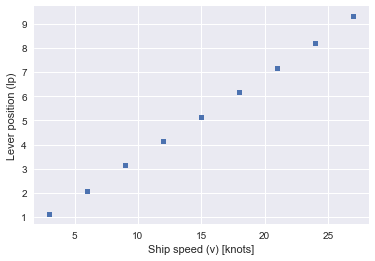

In [14]:
sns.set()
_ = plt.figure(figsize = (9,7))
df.plot(kind = 'scatter', x = "Ship speed (v) [knots]", y ="Lever position (lp)")
plt.show()

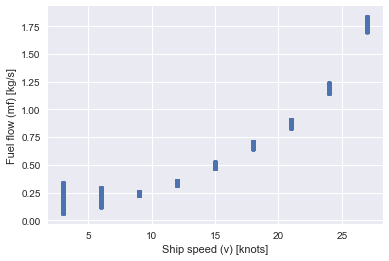

In [11]:
df.plot(kind = 'scatter', x = "Ship speed (v) [knots]", y ="Fuel flow (mf) [kg/s]")
plt.show()

To convert our data frame to numpy array we used .values method 

In [15]:
data_array = df.values

In [16]:
print (data_array)

[[  1.14000000e+00   3.00000000e+00   2.90000000e+02 ...,   8.20000000e-02
    9.50000000e-01   9.75000000e-01]
 [  2.09000000e+00   6.00000000e+00   6.96000000e+03 ...,   2.87000000e-01
    9.50000000e-01   9.75000000e-01]
 [  3.14000000e+00   9.00000000e+00   8.38000000e+03 ...,   2.59000000e-01
    9.50000000e-01   9.75000000e-01]
 ..., 
 [  7.15000000e+00   2.10000000e+01   3.90000000e+04 ...,   8.34000000e-01
    1.00000000e+00   1.00000000e+00]
 [  8.21000000e+00   2.40000000e+01   5.10000000e+04 ...,   1.15000000e+00
    1.00000000e+00   1.00000000e+00]
 [  9.30000000e+00   2.70000000e+01   7.28000000e+04 ...,   1.70000000e+00
    1.00000000e+00   1.00000000e+00]]


In [17]:
print (data_array.shape)

(11934L, 18L)


In [18]:
min_max_scaler = preprocessing.MinMaxScaler()
data_array_minmax = min_max_scaler.fit_transform(data_array)
data_array_minmax

array([[  0.00000000e+00,   0.00000000e+00,   4.96236870e-04, ...,
          7.94551646e-03,   0.00000000e+00,   0.00000000e+00],
       [  1.16421569e-01,   1.25000000e-01,   9.24379015e-02, ...,
          1.24290579e-01,   0.00000000e+00,   0.00000000e+00],
       [  2.45098039e-01,   2.50000000e-01,   1.12011689e-01, ...,
          1.08399546e-01,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  7.36519608e-01,   7.50000000e-01,   5.34088716e-01, ...,
          4.34733258e-01,   1.00000000e+00,   1.00000000e+00],
       [  8.66421569e-01,   8.75000000e-01,   6.99501006e-01, ...,
          6.14074915e-01,   1.00000000e+00,   1.00000000e+00],
       [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          9.26220204e-01,   1.00000000e+00,   1.00000000e+00]])

In this section we splitted our our data two parts randomly, training data (%70) and test data (%30)

In [19]:
from sklearn.model_selection import train_test_split
data_array_train, data_array_test = train_test_split (data_array, test_size=0.3, random_state=42)

In [20]:
print (data_array_train)

[[  6.18000000e+00   1.80000000e+01   2.98000000e+04 ...,   6.78000000e-01
    9.91000000e-01   9.81000000e-01]
 [  2.09000000e+00   6.00000000e+00   3.15000000e+03 ...,   1.56000000e-01
    9.59000000e-01   9.93000000e-01]
 [  5.14000000e+00   1.50000000e+01   2.16000000e+04 ...,   4.72000000e-01
    9.98000000e-01   1.00000000e+00]
 ..., 
 [  9.30000000e+00   2.70000000e+01   7.28000000e+04 ...,   1.80000000e+00
    9.73000000e-01   9.75000000e-01]
 [  6.18000000e+00   1.80000000e+01   2.98000000e+04 ...,   6.82000000e-01
    9.53000000e-01   9.92000000e-01]
 [  8.21000000e+00   2.40000000e+01   5.10000000e+04 ...,   1.21000000e+00
    9.81000000e-01   9.76000000e-01]]


New shape of traning data(8353L, 18L)

In [21]:
print (data_array_train.shape)

(8353L, 18L)


In [22]:
print (data_array_test)

[[  3.14000000e+00   9.00000000e+00   8.38000000e+03 ...,   2.37000000e-01
    9.93000000e-01   9.87000000e-01]
 [  9.30000000e+00   2.70000000e+01   7.28000000e+04 ...,   1.76000000e+00
    9.94000000e-01   9.77000000e-01]
 [  7.15000000e+00   2.10000000e+01   3.90000000e+04 ...,   8.70000000e-01
    9.89000000e-01   9.82000000e-01]
 ..., 
 [  5.14000000e+00   1.50000000e+01   2.16000000e+04 ...,   4.89000000e-01
    9.74000000e-01   9.95000000e-01]
 [  3.14000000e+00   9.00000000e+00   8.38000000e+03 ...,   2.30000000e-01
    9.87000000e-01   1.00000000e+00]
 [  6.18000000e+00   1.80000000e+01   2.98000000e+04 ...,   6.78000000e-01
    9.52000000e-01   9.95000000e-01]]


New shape of test data(3581L, 18L)

In [23]:
print (data_array_test.shape)

(3581L, 18L)


Now we are going to apply scaling, centering, removing zero variance (constant) columns and near zero variance columns. So first we need to import Variance Threshold library from scikit-learn and then apply the zero variance function

In [24]:
from sklearn.feature_selection import VarianceThreshold

To remove the zero variance from training data.

In [25]:
sel = VarianceThreshold(threshold=0)
np_df = sel.fit(data_array_train)

After fitting, the filtered data frame can be obtained using the function below

In [26]:
df_train = pd.DataFrame(data_array_train) 
df_train = df_train.loc[:, sel.get_support()]

Since "GT Compressor inlet air temperature[T1][C]" columns is deleted, we need to reassign the column names.

In [27]:
new_columns1 = ['Lever position (lp)', 'Ship speed (v) [knots]', 'Gas Turbine (GT) shaft torque (GTT) [kN m]', 'GT rate of revolutions (GTn) [rpm]',
              'Gas Generator rate of revolutions (GGn) [rpm]', 'Starboard Propeller Torque (Ts) [kN]', 'Port Propeller Torque (Tp) [kN]',
              'Hight Pressure (HP) Turbine exit temperature (T48) [C]', 'GT Compressor outlet air temperature (T2) [C]',
              'HP Turbine exit pressure (P48) [bar]', 'GT Compressor inlet air pressure (P1) [bar]', 'GT Compressor outlet air pressure (P2) [bar]',
              'GT exhaust gas pressure (Pexh) [bar]', 'Turbine Injecton Control (TIC) [%]', 'Fuel flow (mf) [kg/s]', 'GT Compressor decay state coefficient',
              'GT Turbine decay state coefficient']
df_train.columns = new_columns1

In [28]:
df_train.head()

,Lever position (lp),Ship speed (v) [knots],Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,6.18,18.0,29800.0,2310.0,8790.0,246.00,246.00,772.0,665.0,2.52,0.998,13.30,1.03,34.30,0.678,0.991,0.981
1,2.09,6.0,3150.0,1350.0,6840.0,23.70,23.70,517.0,561.0,1.21,0.998,6.47,1.02,16.80,0.156,0.959,0.993
2,5.14,15.0,21600.0,1920.0,8470.0,175.00,175.00,683.0,629.0,2.09,0.998,11.00,1.03,23.80,0.472,0.998,1.000
3,8.21,24.0,51000.0,3090.0,9310.0,438.00,438.00,901.0,726.0,3.59,0.998,18.30,1.04,58.60,1.160,0.989,0.999
4,1.14,3.0,748.0,1350.0,6640.0,7.62,7.62,469.0,548.0,1.12,0.998,6.03,1.02,8.16,0.093,0.973,0.980


Now we have 17 features and 8353 observations.

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8353 entries, 0 to 8352
Data columns (total 17 columns):
Lever position (lp)                                       8353 non-null float64
Ship speed (v) [knots]                                    8353 non-null float64
Gas Turbine (GT) shaft torque (GTT) [kN m]                8353 non-null float64
GT rate of revolutions (GTn) [rpm]                        8353 non-null float64
Gas Generator rate of revolutions (GGn) [rpm]             8353 non-null float64
Starboard Propeller Torque (Ts) [kN]                      8353 non-null float64
Port Propeller Torque (Tp) [kN]                           8353 non-null float64
Hight Pressure (HP) Turbine exit temperature (T48) [C]    8353 non-null float64
GT Compressor outlet air temperature (T2) [C]             8353 non-null float64
HP Turbine exit pressure (P48) [bar]                      8353 non-null float64
GT Compressor inlet air pressure (P1) [bar]               8353 non-null float64
GT Compressor

It is time to remove zero variance columns from test data

In [30]:
sel = VarianceThreshold(threshold=0)
np_df = sel.fit(data_array_test)

In [31]:
print sel

VarianceThreshold(threshold=0)


After fitting, the filtered data frame can be obtained using the function below

In [32]:
df_test = pd.DataFrame(data_array_test) 
df_test = df_test.loc[:, sel.get_support()]

Since "GT Compressor inlet air temperature[T1][C]" columns is deleted, we need to reassign the column names.

In [33]:
df_test.columns = new_columns1
df_test.head()

,Lever position (lp),Ship speed (v) [knots],Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,3.14,9.0,8380.0,1390.0,7050.0,60.3,60.3,577.0,577.0,1.39,0.998,7.51,1.02,12.0,0.237,0.993,0.987
1,9.30,27.0,72800.0,3560.0,9730.0,645.0,645.0,1060.0,773.0,4.55,0.998,23.00,1.05,88.9,1.760,0.994,0.977
2,7.15,21.0,39000.0,2680.0,9120.0,332.0,332.0,821.0,687.0,2.99,0.998,15.70,1.04,43.9,0.870,0.989,0.982
3,7.15,21.0,39000.0,2680.0,9140.0,332.0,332.0,841.0,697.0,2.96,0.998,15.50,1.04,44.8,0.887,0.951,0.988
4,6.18,18.0,29800.0,2310.0,8820.0,246.0,246.0,774.0,669.0,2.50,0.998,13.20,1.03,34.2,0.677,0.968,0.990


Now we have 17 features and 3581 observations in our test data.

In [34]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3581 entries, 0 to 3580
Data columns (total 17 columns):
Lever position (lp)                                       3581 non-null float64
Ship speed (v) [knots]                                    3581 non-null float64
Gas Turbine (GT) shaft torque (GTT) [kN m]                3581 non-null float64
GT rate of revolutions (GTn) [rpm]                        3581 non-null float64
Gas Generator rate of revolutions (GGn) [rpm]             3581 non-null float64
Starboard Propeller Torque (Ts) [kN]                      3581 non-null float64
Port Propeller Torque (Tp) [kN]                           3581 non-null float64
Hight Pressure (HP) Turbine exit temperature (T48) [C]    3581 non-null float64
GT Compressor outlet air temperature (T2) [C]             3581 non-null float64
HP Turbine exit pressure (P48) [bar]                      3581 non-null float64
GT Compressor inlet air pressure (P1) [bar]               3581 non-null float64
GT Compressor

Now it is time to remove near zero variance if we have in our data sets

In [36]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Lever position (lp),8353.0,5.169488,2.621206e+00,1.140,3.140,5.140,7.150,9.300
Ship speed (v) [knots],8353.0,15.005746,7.729392e+00,3.000,9.000,15.000,21.000,27.000
Gas Turbine (GT) shaft torque (GTT) [kN m],8353.0,27230.282294,2.210452e+04,254.000,8380.000,21600.000,39000.000,72800.000
GT rate of revolutions (GTn) [rpm],8353.0,2136.598827,7.726712e+02,1310.000,1390.000,1920.000,2680.000,3560.000
Gas Generator rate of revolutions (GGn) [rpm],8353.0,8202.461391,1.089349e+03,6590.000,7060.000,8480.000,9130.000,9800.000
Starboard Propeller Torque (Ts) [kN],8353.0,227.155095,1.999567e+02,5.310,60.300,175.000,332.000,645.000
Port Propeller Torque (Tp) [kN],8353.0,227.155095,1.999567e+02,5.310,60.300,175.000,332.000,645.000
Hight Pressure (HP) Turbine exit temperature (T48) [C],8353.0,735.213337,1.734324e+02,442.000,590.000,706.000,834.000,1110.000
GT Compressor outlet air temperature (T2) [C],8353.0,646.158027,7.255988e+01,540.000,578.000,637.000,694.000,789.000
HP Turbine exit pressure (P48) [bar],8353.0,2.352382,1.082084e+00,1.090,1.390,2.080,2.980,4.560


As we can see 'GT exhaust gas pressure (Pexh) [bar]' 

In [37]:
print (df_train['GT exhaust gas pressure (Pexh) [bar]'].unique())
print (df_train['GT exhaust gas pressure (Pexh) [bar]'].var())
print (df_train['GT exhaust gas pressure (Pexh) [bar]'].std())

[ 1.03  1.02  1.04  1.05]
0.000110943463656
0.010532970315


In [38]:
tresh = df_train['GT exhaust gas pressure (Pexh) [bar]'].var()
sel = VarianceThreshold(threshold=tresh)
np_td = sel.fit(df_train)

In [39]:
np_td

VarianceThreshold(threshold=0.000110943463656)

In [40]:
df_train = df_train.loc[:, sel.get_support()]

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8353 entries, 0 to 8352
Data columns (total 14 columns):
Lever position (lp)                                       8353 non-null float64
Ship speed (v) [knots]                                    8353 non-null float64
Gas Turbine (GT) shaft torque (GTT) [kN m]                8353 non-null float64
GT rate of revolutions (GTn) [rpm]                        8353 non-null float64
Gas Generator rate of revolutions (GGn) [rpm]             8353 non-null float64
Starboard Propeller Torque (Ts) [kN]                      8353 non-null float64
Port Propeller Torque (Tp) [kN]                           8353 non-null float64
Hight Pressure (HP) Turbine exit temperature (T48) [C]    8353 non-null float64
GT Compressor outlet air temperature (T2) [C]             8353 non-null float64
HP Turbine exit pressure (P48) [bar]                      8353 non-null float64
GT Compressor outlet air pressure (P2) [bar]              8353 non-null float64
Turbine Injec

In [42]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Lever position (lp),8353.0,5.169488,2.621206,1.140,3.140,5.140,7.150,9.30
Ship speed (v) [knots],8353.0,15.005746,7.729392,3.000,9.000,15.000,21.000,27.00
Gas Turbine (GT) shaft torque (GTT) [kN m],8353.0,27230.282294,22104.515437,254.000,8380.000,21600.000,39000.000,72800.00
GT rate of revolutions (GTn) [rpm],8353.0,2136.598827,772.671207,1310.000,1390.000,1920.000,2680.000,3560.00
Gas Generator rate of revolutions (GGn) [rpm],8353.0,8202.461391,1089.349057,6590.000,7060.000,8480.000,9130.000,9800.00
Starboard Propeller Torque (Ts) [kN],8353.0,227.155095,199.956728,5.310,60.300,175.000,332.000,645.00
Port Propeller Torque (Tp) [kN],8353.0,227.155095,199.956728,5.310,60.300,175.000,332.000,645.00
Hight Pressure (HP) Turbine exit temperature (T48) [C],8353.0,735.213337,173.432444,442.000,590.000,706.000,834.000,1110.00
GT Compressor outlet air temperature (T2) [C],8353.0,646.158027,72.559884,540.000,578.000,637.000,694.000,789.00
HP Turbine exit pressure (P48) [bar],8353.0,2.352382,1.082084,1.090,1.390,2.080,2.980,4.56
